# The Whole Ten Yards

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper', font_scale=1.4)

In [15]:
x = np.arange(0, 1001, 1)

def fd_diffusion(u):
    """Finite difference scheme for Fick's law"""
    lapl = np.empty(len(u))
    lapl[0] = u[-1] - 2*u[0] + u[1]
    lapl[1:-1] = u[:-2] - 2*u[1:-1] + u[2:]
    lapl[-1] = u[-2] - 2*u[-1] + u[0]
    return lapl

In [16]:
J = np.array([[0.5, 0.6], [-1.9, -2]])

def turing(_, c):
    dc = J @ c.reshape(J.shape[0], -1)
    dc[0] -= c[:len(x)]**3
    dc[0] += 2*fd_diffusion(c[:len(x)])
    dc[1] += 25*fd_diffusion(c[len(x):])
    return dc.ravel()

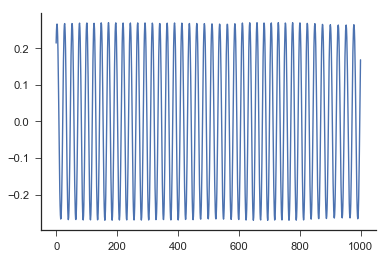

In [17]:
c_0 = np.random.rand(len(x)*J.shape[0])/100
c = solve_ivp(turing, [0, 1e3], c_0, 'BDF')

plt.plot(c.y[:, -1][:len(x)])
sns.despine()
plt.show()

In [18]:
J = np.zeros([10, 10])
J[0, 0] = -8.6;    J[0, 1] = 5.7315;  J[0, 2] = 8.5557;  J[0, 3] = 10.2444;  
J[0, 4] = 10.0173; J[0, 5] = 7.9602;  J[0, 6] = 4.8717;  J[0, 7] = 1.2872;   
J[0, 8] = 2.0736;  J[0, 9] =1.8157;   

J[1, 0] = -5.7315; J[2, 1] = 1.4928;J[3, 2] = 1.1974;   J[4, 3] = 0.9778;  
J[5, 4] = 0.7946;  J[6, 5] = 0.6120; J[7, 6] = 0.2642;  J[8, 7] = -1.6109; 
J[9, 8] = 0.8756;  

J[6, 9] = 0.1417;

np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 180
print(J)

[[ -8.6      5.7315   8.5557  10.2444  10.0173   7.9602   4.8717   1.2872   2.0736   1.8157]
 [ -5.7315   0.       0.       0.       0.       0.       0.       0.       0.       0.    ]
 [  0.       1.4928   0.       0.       0.       0.       0.       0.       0.       0.    ]
 [  0.       0.       1.1974   0.       0.       0.       0.       0.       0.       0.    ]
 [  0.       0.       0.       0.9778   0.       0.       0.       0.       0.       0.    ]
 [  0.       0.       0.       0.       0.7946   0.       0.       0.       0.       0.    ]
 [  0.       0.       0.       0.       0.       0.612    0.       0.       0.       0.1417]
 [  0.       0.       0.       0.       0.       0.       0.2642   0.       0.       0.    ]
 [  0.       0.       0.       0.       0.       0.       0.      -1.6109   0.       0.    ]
 [  0.       0.       0.       0.       0.       0.       0.       0.       0.8756   0.    ]]


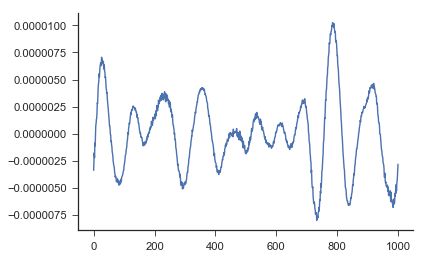

In [19]:
def turing(_, c):
    dc = 0.1*J @ c.reshape(J.shape[0], -1)
    for i in [6, 7, 8, 9]:
        dc[i] += 50*fd_diffusion(c[len(x)*i:len(x)*(i + 1)])
    for i in range(9):
        dc[i] -= c[len(x)*i:len(x)*(i + 1)]**3
    return dc.ravel()


c_0 = np.random.rand(len(x)*J.shape[0])*1e-3
c = solve_ivp(turing, [0, 1e3], c_0, 'BDF')

plt.plot(c.y[:, -1][:len(x)])
# plt.plot(c.y[:, -1][7*len(x):8*len(x)])
sns.despine()
plt.show()

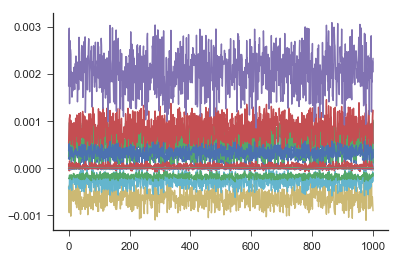

In [20]:
plt.plot(c.y[:, ::10][:len(x)])
# plt.plot(c.y[:, -1][7*len(x):8*len(x)])
sns.despine()
plt.show()

1


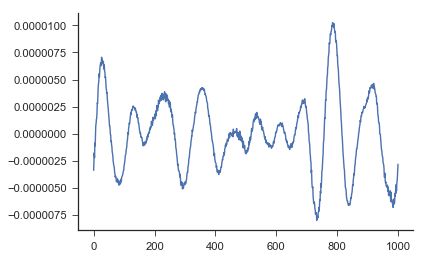

2


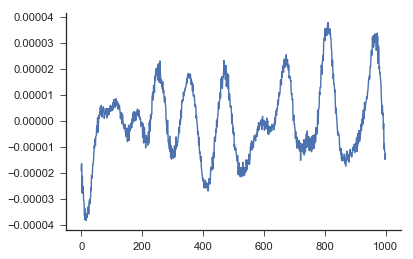

3


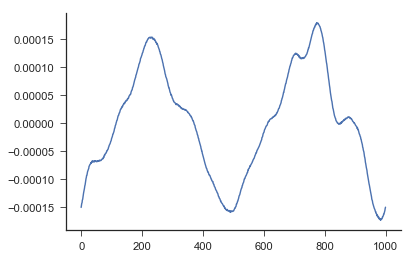

4


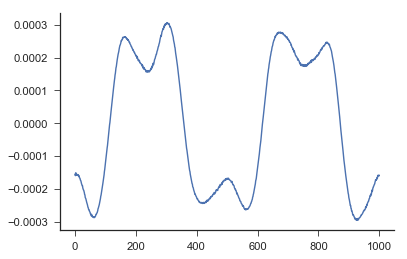

5


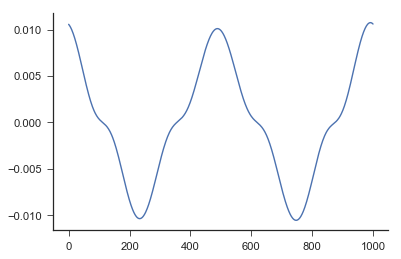

6


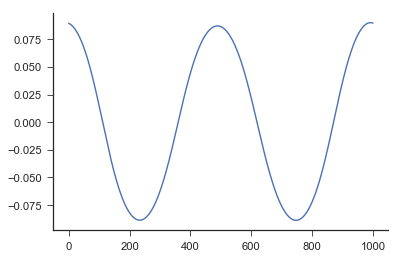

7


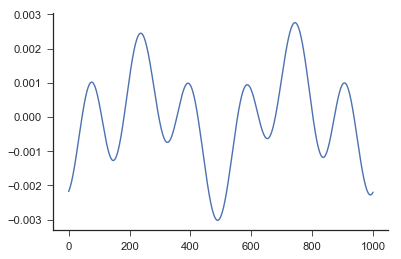

8


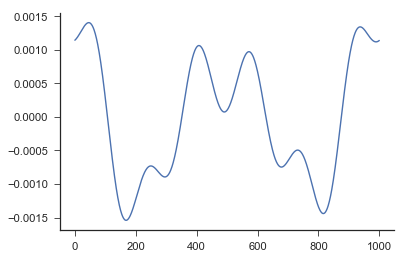

9


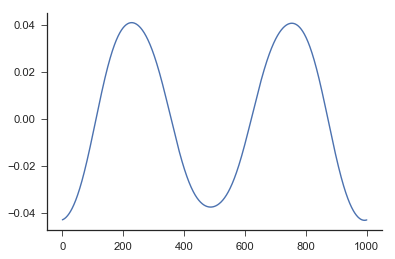

10


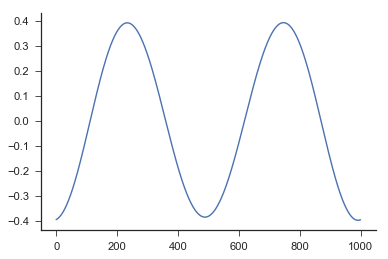

In [21]:
for i in np.arange(10):
    print(i + 1)
    plt.plot(c.y[:, -1][i*len(x):(i + 1)*len(x)])
    sns.despine()
    plt.show()

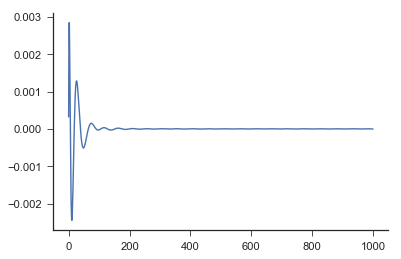

In [22]:
plt.plot(c.t, c.y[1])
sns.despine()
plt.show()

In [10]:
np.linalg.cond(J)

24187.532703875906

In [11]:
np.linalg.cond?

In [12]:
np.linalg.det(J)

0.049691262062217176

In [13]:
(np.real(np.linalg.eigvals(J)) < 0).all()

True